<a href="https://colab.research.google.com/github/AanchalKankrecha/Playstore-Data-Analysis/blob/main/Regression_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Let's Begin!**

In [1]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **1.Dataset Loading**






`**Importing necessary libraries** 

In [2]:
#Importing necessary libraries under different alias for convinient usage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from haversine import haversine 

**Hand shaking with google drive**

In [3]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Accessing dataset from google drive**

In [4]:
#Storing NYC taxi dataset in table named df
df=pd.read_csv('/content/drive/MyDrive/Capstone2/NYC_Dataset.csv')

## **2.Overview and understanding of dataset**

In [5]:

# displaying top 5 records of the dataset
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
# displaying bottom 5 records of the dataset
df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [7]:
#Shape of the dataset
df.shape

(1458644, 11)

Thus, our dataset contains 1458644 records for 11 different columns.

In [8]:
#to get data type of different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [9]:
#Checking for null values in each column
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [10]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [11]:
# Describing dataset including all columns(Numerical as well as Categorical)
df.describe(include='all')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,1458644,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id2875421,NaN,2016-03-04 08:07:34,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
mean,NaN,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,NaN,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,NaN,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,NaN,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02
50%,NaN,2.000000e+00,NaN,NaN,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,NaN,6.620000e+02
75%,NaN,2.000000e+00,NaN,NaN,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,NaN,1.075000e+03


**Dataset understanding**

1.   Dataset contains 1458644 records of taxi customers with 11 different  variables.
2.   Out of 11 variables 7 are numerical and 4 are categorical.

    Numerical columns are vendor_id	passenger_count	pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude	trip_duration.

    Categorical columns are 'id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag'.
3. Pasenger count varies from 1 to 9.
4. Minimum Trip duration is 1 second and maximum trip duration is 3526282 seconds which means approx more than 40 days journey which seems to be an outlier. So we are further going to deal with such outliers to make our predictions more precise.





Hurray!!!

Our dataset contains no null values.Thus no need to worry about missing value treatment problem.

In [12]:
#number of unique values in each column
df.nunique().reset_index()

,index,0
0,id,1458644
1,vendor_id,2
2,pickup_datetime,1380222
3,dropoff_datetime,1380377
4,passenger_count,10
5,pickup_longitude,23047
6,pickup_latitude,45245
7,dropoff_longitude,33821
8,dropoff_latitude,62519
9,store_and_fwd_flag,2


In [13]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],errors='raise',dayfirst=False)
df['dropoff_datetime']=pd.to_datetime(df['pickup_datetime'],errors='raise',dayfirst=False)

In [14]:
df['pickup_day']=df.pickup_datetime.dt.day
df['dropoff_day']=df.dropoff_datetime.dt.day
df['pickup_weekday']=df.pickup_datetime.dt.weekday
df['dropoff_weekday']=df.dropoff_datetime.dt.weekday
df['pickup_month']=df.pickup_datetime.dt.month
df['dropoff_month']=df.dropoff_datetime.dt.month
df['pickup_hour']=df.pickup_datetime.dt.hour
df['dropoff_hour']=df.dropoff_datetime.dt.hour 

In [16]:
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [17]:
df['distance'] = df.apply(lambda x: calc_distance(x), axis = 1)

In [18]:
# Creating new column for speed of taxi in km per hour
df['speed']=df.distance/(df.trip_duration/3600)

In [19]:
df.dtypes.reset_index()

,index,0
0,id,object
1,vendor_id,int64
2,pickup_datetime,datetime64[ns]
3,dropoff_datetime,datetime64[ns]
4,passenger_count,int64
5,pickup_longitude,float64
6,pickup_latitude,float64
7,dropoff_longitude,float64
8,dropoff_latitude,float64
9,store_and_fwd_flag,object


In [20]:
def time_of_day(x):
  if x in range(6,12):
    return 'Morning'
  elif x in range(12,16):
    return 'Afternoon'
  elif x in range(16,22):
    return 'Evening'
  else:
    return 'Late night' 

In [21]:
df['pickup_time_of_day'] = df['pickup_hour'].apply(time_of_day)
df['dropoff_time_of_day'] = df['dropoff_hour'].apply(time_of_day)

# **Exploratory Data Analysis**
1. **Univariate:** 
Univariate analysis is the analysis of one variable. It's major purpose is to describe patterns in the data consisting of single variable and gives more concise description of the location, dispersion, and distribution of a variable

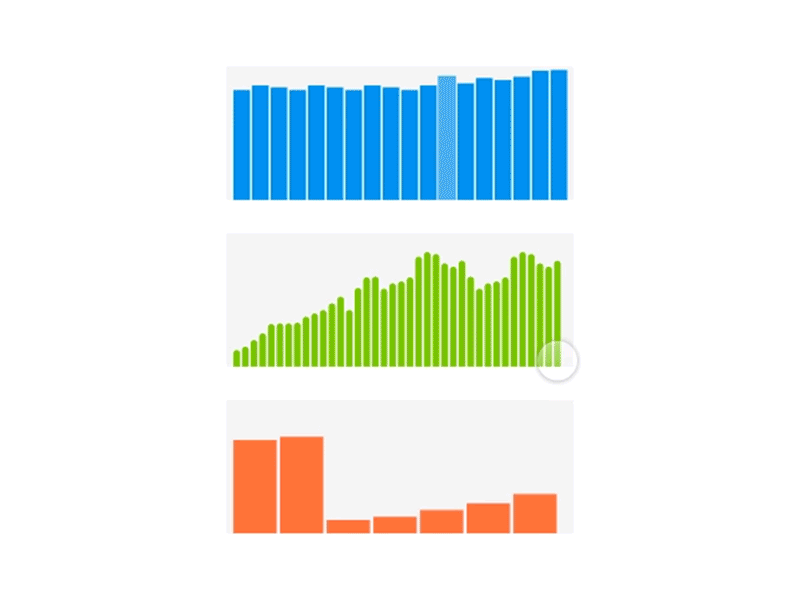

**trip_duration**

In [ ]:
sns.violinplot(df['trip_duration'])

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(df['trip_duration'])

In [ ]:
plt.boxplot(df['trip_duration'])
plt.show()

**Outlier detection:**From the box plot it is clear that some of the data points are nearer to 2*10^6=2000000 = approx 23 days which can be considered as an outlier and none of the journey is for less than 15 seconds atleast. Therefore dropping them


**Outlier Handling**

In [22]:
#Dropping records with outliers in trip duration column
df.drop(df[df['trip_duration']>1000000].index,inplace=True)
df.drop(df[df['trip_duration']<15].index,inplace=True)
df.shape

(1455820, 23)

**passenger_count**

In [23]:
p=df.groupby(by='passenger_count')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


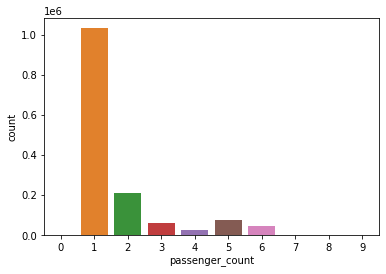

In [24]:
sns.countplot(df.passenger_count)

In [ ]:
plt.boxplot(df['passenger_count'])
plt.show()

In [25]:
a=df['passenger_count'].value_counts()
a

1    1031151
2     210074
5      78016
3      59846
6      48305
4      28390
0         33
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [ ]:
a.plot(kind='pie')
plt.legend()
plt.show()

Mostly there are rides for single passengers followed by 2 passengers then less rides for 5,3,6,4,0,7,9,8

In [26]:
df[df['passenger_count']>6]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_weekday,dropoff_weekday,pickup_month,dropoff_month,pickup_hour,dropoff_hour,distance,speed,pickup_time_of_day,dropoff_time_of_day
433304,id3280610,2,2016-06-07 10:06:24,2016-06-07 10:06:24,7,-74.173668,40.737274,-74.173660,40.737297,N,...,1,1,6,6,10,10,0.002625,0.497364,Morning,Morning
436047,id2489742,2,2016-06-24 08:09:21,2016-06-24 08:09:21,9,-73.710632,40.671581,-73.710632,40.671581,N,...,4,4,6,6,8,8,0.000000,0.000000,Morning,Morning
489613,id0506488,2,2016-05-08 22:39:08,2016-05-08 22:39:08,7,-74.039482,40.715031,-74.039482,40.715019,N,...,6,6,5,5,22,22,0.001273,0.305406,Late night,Late night
824904,id0988237,2,2016-04-23 19:46:08,2016-04-23 19:46:08,7,-73.631149,40.768551,-73.631149,40.768551,N,...,5,5,4,4,19,19,0.000000,0.000000,Evening,Evening
826064,id1488553,2,2016-01-01 01:15:20,2016-01-01 01:15:20,8,-73.992653,40.768719,-74.041374,40.729954,N,...,4,4,1,1,1,1,5.951861,206.025949,Late night,Late night


The maximum amount of passengers allowed in a yellow taxicab by law is 4 in a 4 passenger taxicab or 5 passengers in a 5 passenger taxicab, except that an additional passenger must be accepted if such passenger is under the age of seven and is held on the lap of an adult passenger seated in the rear.Thus, total no. of passengers cannot exceed 6.

So we can drop records having more than 6 passengers as they are purely outliers.

In [27]:
#dropping records having more than 6 passengers
df.drop(df[df['passenger_count']>6].index,inplace=True)
df.drop(df[df['passenger_count']==0].index,inplace=True)

In [ ]:
#None of the ride have no passenger therefore droping records having 0 passenger

In [28]:
df.shape

(1455782, 23)

**store_and_fwd_flag**

In [29]:
df['store_and_fwd_flag'].value_counts()

N    1447798
Y       7984
Name: store_and_fwd_flag, dtype: int64

In [ ]:
#pie plot for store_and_fwd_flag
plt.pie(df['store_and_fwd_flag'].value_counts(),labels=['N','Y'])
plt.title('store_and_fwd_flag')
plt.legend()
plt.show()

**vendor_id**

In [ ]:
sns.countplot(df['vendor_id'])


Number of rides by both the vendors have no vast difference

Creating new features from date time by extracting day,weekday,month,year,hour from pickup datetime column

In [ ]:
df.head()

In [ ]:
df.shape

In [31]:
df['pickup_weekday'].value_counts()

4    223119
5    220459
3    218108
2    209794
1    202379
6    194898
0    187025
Name: pickup_weekday, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


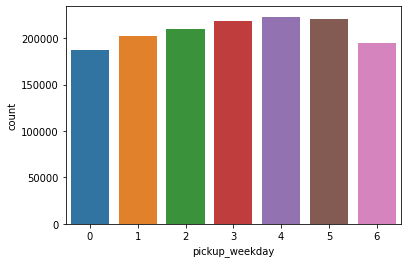

In [32]:
sns.countplot(df['pickup_weekday'])

Maximum no. of rides were booked on Friday.

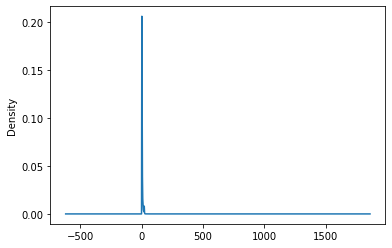

In [33]:
df['distance'].plot(kind='density')

In [ ]:
plt.boxplot(df['distance'])

In [34]:
df[df['distance']>800]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_weekday,dropoff_weekday,pickup_month,dropoff_month,pickup_hour,dropoff_hour,distance,speed,pickup_time_of_day,dropoff_time_of_day
184925,id2306955,1,2016-05-07 18:58:53,2016-05-07 18:58:53,1,-72.809669,51.881084,-73.987228,40.750599,N,...,5,5,5,5,18,18,1240.910391,5640.501776,Evening,Evening
974378,id1510552,2,2016-01-06 20:40:52,2016-01-06 20:40:52,5,-71.799896,35.081532,-79.352837,40.436329,N,...,2,2,1,1,20,20,891.215334,5251.023246,Evening,Evening


From above we can see that 1240 km is covered in 792 seconds i.e. approximately 13min which is impossible for a taxi.

Similarly, it is not possible to cover 891 km in approx 10 min,
Therefore, considering them outlier and droping these records

In [35]:
#dropping records having more than 800 km of travelling
df.drop(df[df['distance']>800].index,inplace=True)

**Hour**

In [37]:
#storing no. of counts of taxi in each hour of the day in a dataframe
name=df.pickup_hour.value_counts().to_frame().reset_index()

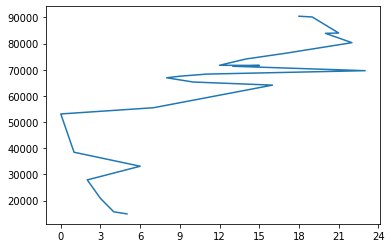

In [39]:
from matplotlib.ticker import MaxNLocator
x=name['index']
y=name['pickup_hour']
plt.plot(x,y) 
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
plt.gca().yaxis.set_major_locator(MaxNLocator(prune='lower'))
plt.show()


pick hour for taxi is 18 i.e around 6:00 p.m. because this is the most often office,coaching, institute leaving time in this corporate world

In [40]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_weekday',
       'dropoff_weekday', 'pickup_month', 'dropoff_month', 'pickup_hour',
       'dropoff_hour', 'distance', 'speed', 'pickup_time_of_day',
       'dropoff_time_of_day'],
      dtype='object')

In [ ]:
df[['pickup_day','pickup_weekday']]

In [43]:
num_cols=['vendor_id', 'passenger_count', 'store_and_fwd_flag',
       'pickup_weekday', 'pickup_hour']

**Bivariate**

**Vendor Id vs Trip Duration
**

In [ ]:
'''plt.figure(figsize=(20,20))
for x,y in zip(range(1,len(num_cols)+1),num_cols):
  plt.subplot(6,3,x)
  print(x,y)
  sns.stripplot('trip_duration',y,data=df,palette="Set1")
  plt.xlabel('price range',fontsize=16)
  plt.suptitle('Price range with diffferent numerical variables',fontsize=30,weight='bold')'''

**Bivariate analysis**

Bivariate analysis is one of the statistical analysis where two variables are observed. One variable here is dependent while the other is independent, here we analyse the changes occured between the two variables and to what extent.

In [ ]:
sns.stripplot(x='trip_duration',y='vendor_id',data=df)
plt.show()

**Trip duration vs vendor id**

In [ ]:
#Using scatter plot to visualize trip duration of different vendor id
sns.scatterplot(y='trip_duration',x='vendor_id',data=df)

From the above scatter plot we can infer that vendor id 2 has more no. of rides and covering almost all the trip duration time while vendor id 1 has least no. of rides and has low trip duration time.None of the ride by vendor id 1 has time duration more than 60,000 seconds i.e  16 hrs

**Trip duration vs store and forward flag**

In [ ]:
#Using bar plot to visualize trip duration with and without store and forward flag
sns.barplot(y='trip_duration',x='store_and_fwd_flag',data=df)

**Trip duration vs passenger count**

In [ ]:
#Visualizing trip duration with different number of passengers in the taxi
sns.violinplot(y='trip_duration',x='passenger_count',data=df) 

From the above violin plot, we can infer that almost all the taxis with different passenger count are densed towards lower trip duration.

Amongst all the violins the width of the violin corresponding to passenger count 1 is maximum shows that most of the taxis have 1 passenger. 

**Trip duration vs Weekday**

In [ ]:
sns.lineplot(y='trip_duration',x='weekday',data=df) 

In [ ]:
sns.lineplot(x='hour',y='trip_duration',data=df)

Maximum trip duration is around 15 i.e. 3:00 p.m and minimum is around 5:30-6:00 a.m. due to lowest or no traffic in the morning.

In [ ]:
sns.barplot(x='hour',y='trip_duration',data=df)

In [ ]:
sns.scatterplot(x='distance',y='trip_duration',data=df)

Too many data points are clustered near distance zero and having high trip duration which sounds impossible, Therefore exploring them to understand the inconsistent readings!

**Assumption:** A trip which is cancelled after booking can not take more than 3 minute. 

Therefore, considering them as cancelled rides and removing from the dataset. 



In [44]:
# Removing cancelled ride data records 
df=df[~((df['distance']==0) & (df['trip_duration']>60))]


Some of the records showing distance of less than 1 km in more than an hour which is leading to inconsistency. 

So remove those records in order to make our model more precise.  

In [45]:
# Removing inconsistent records 
df=df[~((df['distance']<1) & (df['trip_duration']>3600))] 

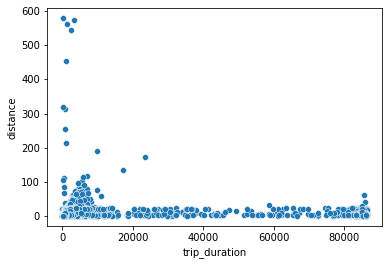

In [46]:
sns.scatterplot(y='distance',x='trip_duration',data=df)

In [ ]:
sns.swarmplot(x='speed',y='trip_duration',data=df)

In [ ]:
sns.lineplot(x='speed',y='trip_duration',data=df)

In [ ]:
sns.scatterplot(x='speed',y='trip_duration',data=df)

**Outlier detection and handling**


In [48]:
num_col=df.describe().columns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


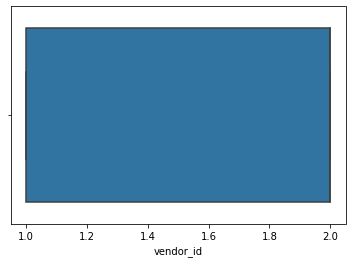

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


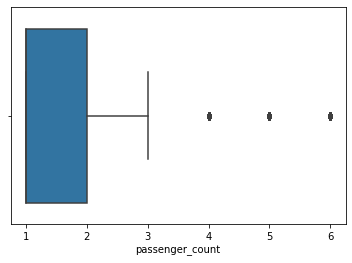

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


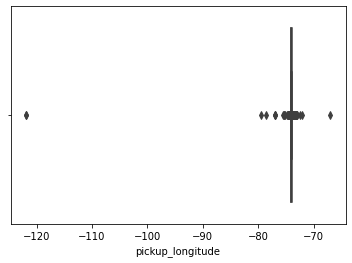

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


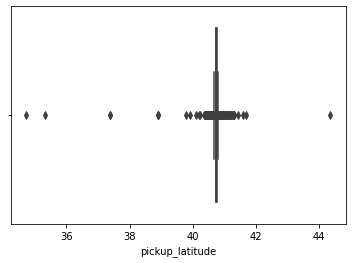

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


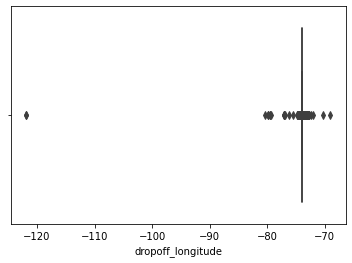

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


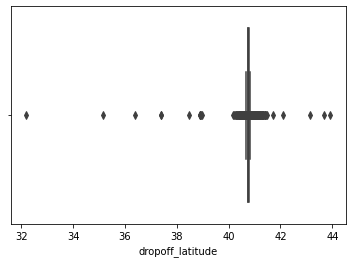

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


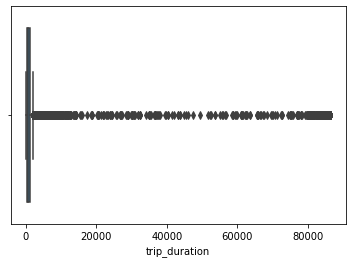

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


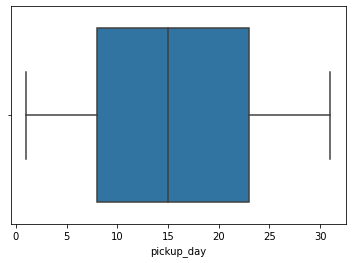

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


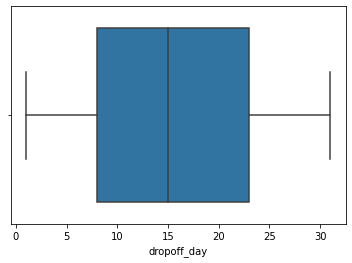

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


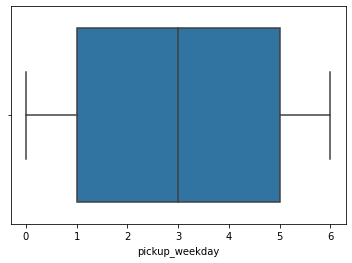

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


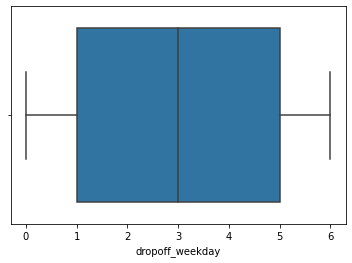

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


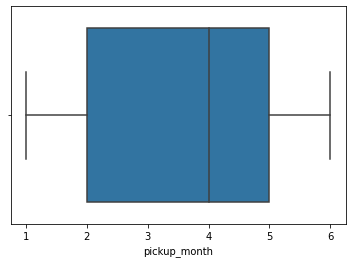

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


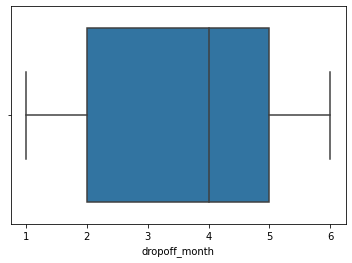

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


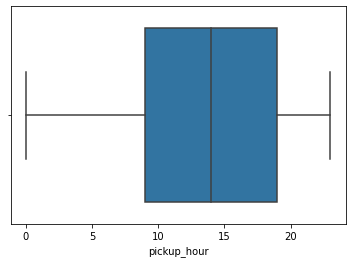

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


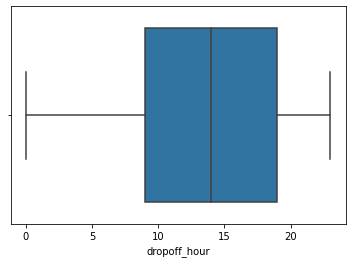

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


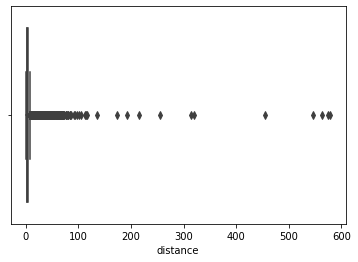

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


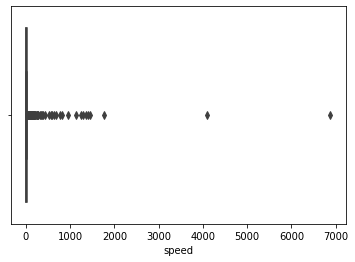

In [50]:
for i in num_col:
  sns.boxplot(df[i])
  plt.show()

In [51]:
def check_outliers(start,end,step,column):
  for i in range(start,end,step):
    a = column.values
    a=np.sort(a)
    print('{} percentile value is {}'.format(i,int(column.quantile(i/100))))
  print('{} percentile value is {}'.format(100,a[-1]))

  

In [52]:
check_outliers(0,100,9,df['trip_duration'])

0 percentile value is 15
9 percentile value is 236
18 percentile value is 330
27 percentile value is 418
36 percentile value is 508
45 percentile value is 605
54 percentile value is 715
63 percentile value is 845
72 percentile value is 1009
81 percentile value is 1240
90 percentile value is 1634
99 percentile value is 3415
100 percentile value is 86392


In [53]:
check_outliers(90,100,1,df['trip_duration'])

90 percentile value is 1634
91 percentile value is 1703
92 percentile value is 1779
93 percentile value is 1868
94 percentile value is 1974
95 percentile value is 2103
96 percentile value is 2270
97 percentile value is 2492
98 percentile value is 2819
99 percentile value is 3415
100 percentile value is 86392


**Inference:** Since 99% of the values are below 3415, 

So it is better to drop 1% of the values greater than 3415 considering them as outlier.

In [54]:
df = df.drop(df[df['trip_duration']>3415].index)

In [55]:
df.shape

(1436621, 23)

In [ ]:
sns.boxplot(df['trip_duration'])

In [56]:
df[df['passenger_count']>6]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_weekday,dropoff_weekday,pickup_month,dropoff_month,pickup_hour,dropoff_hour,distance,speed,pickup_time_of_day,dropoff_time_of_day


In [57]:
check_outliers(0,100,9,df['distance'])

0 percentile value is 0
9 percentile value is 0
18 percentile value is 1
27 percentile value is 1
36 percentile value is 1
45 percentile value is 1
54 percentile value is 2
63 percentile value is 2
72 percentile value is 3
81 percentile value is 4
90 percentile value is 7
99 percentile value is 20
100 percentile value is 578.8436170414994


In [58]:
df = df.drop(df[df['distance']>20].index)

In [ ]:
sns.boxplot(df['distance'])

In [59]:
check_outliers(0,10,1,df['speed'])

0 percentile value is 0
1 percentile value is 2
2 percentile value is 3
3 percentile value is 4
4 percentile value is 4
5 percentile value is 5
6 percentile value is 5
7 percentile value is 5
8 percentile value is 6
9 percentile value is 6
100 percentile value is 1408.1067829566764


In [60]:
check_outliers(90,100,1,df['speed'])

90 percentile value is 23
91 percentile value is 24
92 percentile value is 25
93 percentile value is 26
94 percentile value is 27
95 percentile value is 28
96 percentile value is 29
97 percentile value is 31
98 percentile value is 34
99 percentile value is 39
100 percentile value is 1408.1067829566764


In [61]:
df = df.drop(df[df['speed']>39].index)

In [ ]:
sns.boxplot(df['speed'])

In [62]:
df=df.drop(df[df['speed']<=4].index)

From the domain knowledge we know that if taxi speed is less than or 4 i.e covering only 4 km in an hour which is even worst than an padestrian.

Therefore dropping those records.

**Which outlier detection method is used and why?**



*   Box plot and percentile method is used.
*   Box plot is the best way to visualize and detect outliers in the dataset.
*   Percentile method is used to keep an eye from where the outliers are started or to generallise after which percentage a value to be considered as an outlier.


In [63]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_weekday',
       'dropoff_weekday', 'pickup_month', 'dropoff_month', 'pickup_hour',
       'dropoff_hour', 'distance', 'speed', 'pickup_time_of_day',
       'dropoff_time_of_day'],
      dtype='object')

In [64]:
df['store_and_fwd_flag']=df['store_and_fwd_flag'].apply(lambda x:1 if x=='Y' else '0')

In [65]:
df1 = pd.get_dummies(df , columns=['store_and_fwd_flag','pickup_time_of_day','dropoff_time_of_day'],prefix=['store','pickup','dropoff'])

In [66]:
df1.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,...,store_1,store_0,pickup_Afternoon,pickup_Evening,pickup_Late night,pickup_Morning,dropoff_Afternoon,dropoff_Evening,dropoff_Late night,dropoff_Morning
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,778,...,0,1,1,0,0,0,1,0,0,0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,655,...,0,1,0,0,0,1,0,0,0,1
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,764,...,0,1,0,0,0,1,0,0,0,1
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,373,...,0,1,1,0,0,0,1,0,0,0
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:44:25,1,-73.979538,40.781750,-73.972809,40.790585,198,...,0,1,1,0,0,0,1,0,0,0


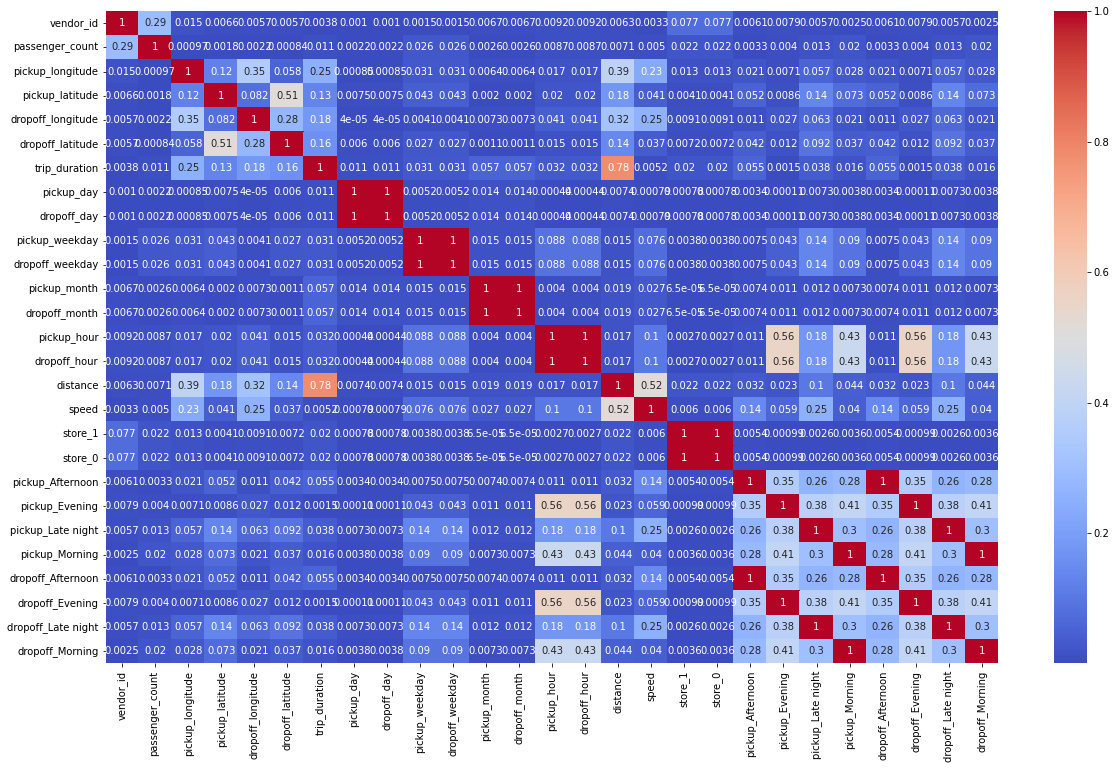

In [67]:
plt.figure(figsize=(20,12))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

In [68]:
df1.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'pickup_day',
       'dropoff_day', 'pickup_weekday', 'dropoff_weekday', 'pickup_month',
       'dropoff_month', 'pickup_hour', 'dropoff_hour', 'distance', 'speed',
       'store_1', 'store_0', 'pickup_Afternoon', 'pickup_Evening',
       'pickup_Late night', 'pickup_Morning', 'dropoff_Afternoon',
       'dropoff_Evening', 'dropoff_Late night', 'dropoff_Morning'],
      dtype='object')

In [69]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_weekday',
       'dropoff_weekday', 'pickup_month', 'dropoff_month', 'pickup_hour',
       'dropoff_hour', 'distance', 'speed', 'pickup_time_of_day',
       'dropoff_time_of_day'],
      dtype='object')

In [71]:
['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'pickup_day',
       'dropoff_day', 'pickup_weekday', 'dropoff_weekday', 'pickup_month',
       'dropoff_month', 'pickup_hour', 'dropoff_hour', 'distance', 'speed',
       'store_1', 'store_0', 'pickup_Afternoon', 'pickup_Evening',
       'pickup_Late night', 'pickup_Morning', 'dropoff_Afternoon',
       'dropoff_Evening', 'dropoff_Late night', 'dropoff_Morning']

['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_weekday',
       'dropoff_weekday', 'pickup_month', 'dropoff_month', 'pickup_hour',
       'dropoff_hour', 'distance', 'speed', 'pickup_time_of_day',
       'dropoff_time_of_day']

TypeError: ignored